# Computer Vision Project

In [ ]:
# Project - Tor Henrik Nilsen 7 May 2021

# Part 1 - Load Data, Libriaries, Visualize data

In [1]:

#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Load Data
images = np.load('/content/drive/My Drive/ComputerVision/images.npy')
classes = pd.read_csv('/content/drive/My Drive/ComputerVision/Labels.csv')

In [4]:
### Load extra dataset for presenting examples
images2 = np.load('/content/drive/My Drive/ComputerVision/images.npy')

In [5]:
# Checking the dimenseions of the array of the image set
images.shape

(4750, 128, 128, 3)

In [6]:
# Checking the dimension of the array of the labels, hereby defiend as classes
classes.shape

(4750, 1)

### Convert to array

In [7]:
### The classes dataset is a dataframe and needs to be converted to an array
classes = classes.values
classes = classes[:,0]
classes.shape

(4750,)

In [8]:
### Overview of the classes - Not perfectly balanced as some classes have many more observations

print("---------info of data set ----------------------------")
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
print("------------------------------------------------------")
  
pd.DataFrame(classes).value_counts()

---------info of data set ----------------------------
images shape:  (4750, 128, 128, 3)
classes shape:  (4750,)
------------------------------------------------------


Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

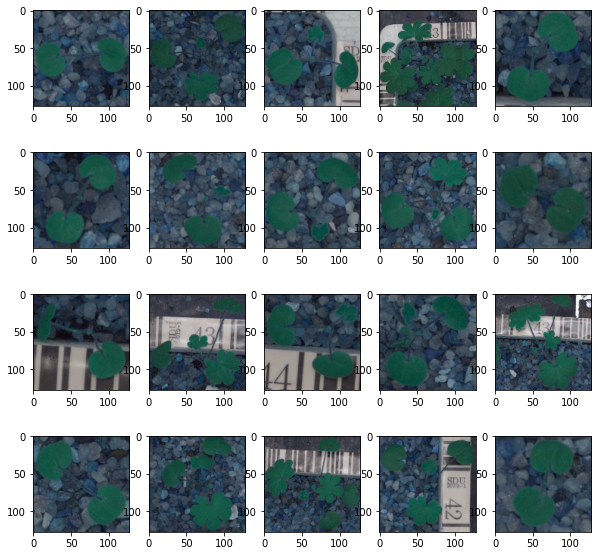

In [ ]:
### View some images

for i in range(20):
  plt.rcParams["figure.figsize"] = (10,10)
  plt.subplot(4,5, i+1)
  plt.imshow(images[i])

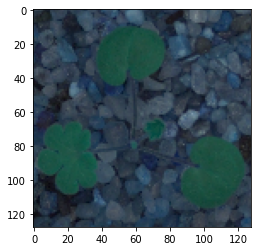

In [ ]:
# Show one bigger example of an image
plt.imshow(images[50])


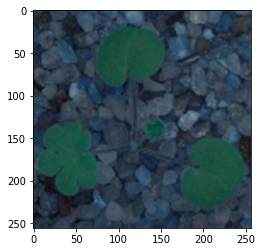

In [ ]:
# Later the image will ne scaled, visualize a scaled image
plt.imshow(images[50]/255)

In [9]:
#see number of images in each class
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)


images shape:  (4750, 128, 128, 3)
classes shape:  (4750,)


# Visualizing an image in RGB Color Space

Parts of code was taken from : https://realpython.com/python-opencv-color-spaces/

In [ ]:
def Visualize_RGB_Color_Space(varImage):
  from mpl_toolkits.mplot3d import Axes3D
  from matplotlib import cm
  from matplotlib import colors

  r, g, b = cv2.split(varImage)
  fig = plt.figure()
  axis = fig.add_subplot(1, 1, 1, projection="3d")

  pixel_colors = varImage.reshape((np.shape(varImage)[0]*np.shape(image)[1], 3))
  norm = colors.Normalize(vmin=-1.,vmax=1.)
  norm.autoscale(pixel_colors)
  pixel_colors = norm(pixel_colors).tolist()

  axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
  axis.set_xlabel("Red")
  axis.set_ylabel("Green")
  axis.set_zlabel("Blue")
  plt.show()


In [ ]:
image1 = images2[classes == "Small-flowered Cranesbill"][20]
image2 = images2[classes == "Small-flowered Cranesbill"][25]
image3 = images2[classes == "Small-flowered Cranesbill"][30]

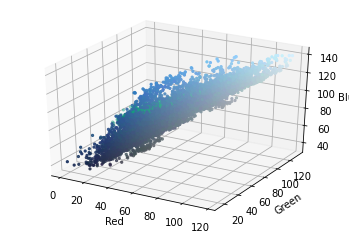

In [ ]:
Visualize_RGB_Color_Space(image1)

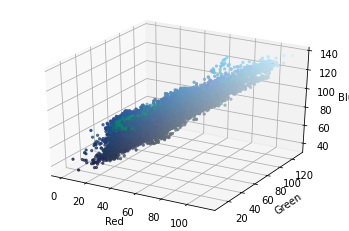

In [ ]:
Visualize_RGB_Color_Space(image2)

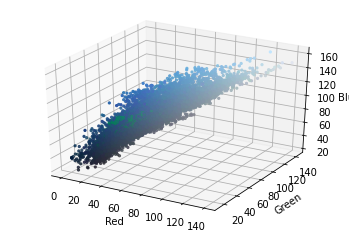

In [ ]:
Visualize_RGB_Color_Space(image3)

In [ ]:
classes_df = pd.DataFrame(classes)
classes_df.head(5)

,0
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [ ]:
### Observation: As we can see in the color space graphs, there is a lot ob blue and a bit of green. The blue representing color shcemes from the grovel and the green representing the plant leaves

## Convert from RGB to HSV

In [ ]:
### Convert to HSV

In [ ]:
def RGB_to_HSV(varImage):
  hsv_image = cv2.cvtColor(varImage, cv2.COLOR_RGB2HSV)

  h, s, v = cv2.split(hsv_image)
  fig = plt.figure()
  axis = fig.add_subplot(1, 1, 1, projection="3d")

  axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
  axis.set_xlabel("Hue")
  axis.set_ylabel("Saturation")
  axis.set_zlabel("Value")
  plt.show()

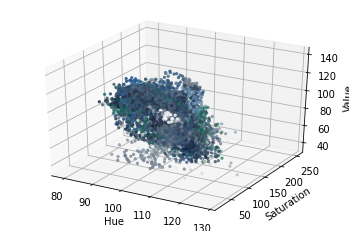

In [ ]:
RGB_to_HSV(image1)

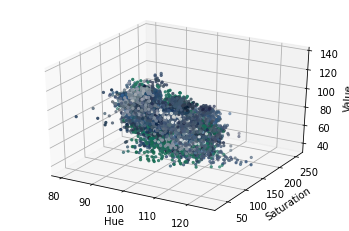

In [ ]:
RGB_to_HSV(image2)

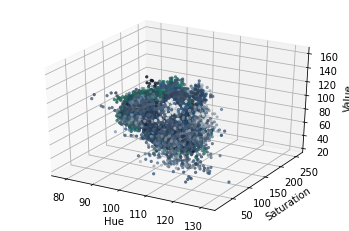

In [ ]:
RGB_to_HSV(image3)

In [ ]:
### In HSV space, the colors are more separable and located within a small range. This can be leveraged for segmentation

# Part 2 - Image Processing and visualization of the preprocessed images

Prepocessing steps has been applied after following tutorials from two other courses and sources on the internet. 
Courses taken: Deep Learning and Computer Vision in Python by Sundog Education (Udemy) and Python for COmputer Vision with OpenCV and Deeep Learning by Jose Portilla (Udemy)
The internet sources are refered to when applied.



### GaussianBlur

Image Smoothing techniques help in reducing different types of noise.
OpenCV provides cv2.gaussianblur() function to apply Gaussian Smoothing on the input source image. 

dst = cv2.GaussianBlur(src, ksize, sigmaX)
src	input image
dst	output image
ksize	Gaussian Kernel Size. [height width]. height and width should be odd and can have different values. If ksize is set to [0 0], then ksize is computed from sigma values.

Source: https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/


A Gaussian blur is an image filter that uses a kind of function called a Gaussian to transform each pixel in the image. It has the result of smoothing out image noise and reducing detail



In [10]:
# Creating a function of blurring and sharpening the image
# Sharpening of the image was necessary to do other preprocessing techniques
def Blur_sharp_image(image):
    image_blur = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blur, -0.5, 0)
    return image_sharp
    

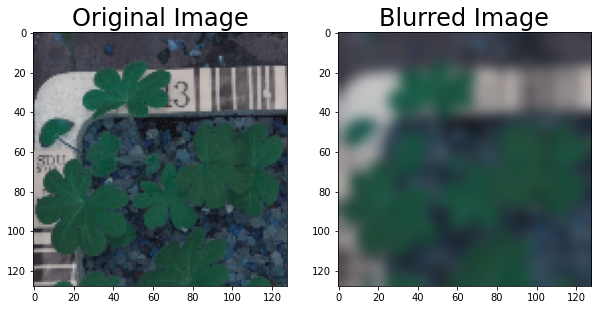

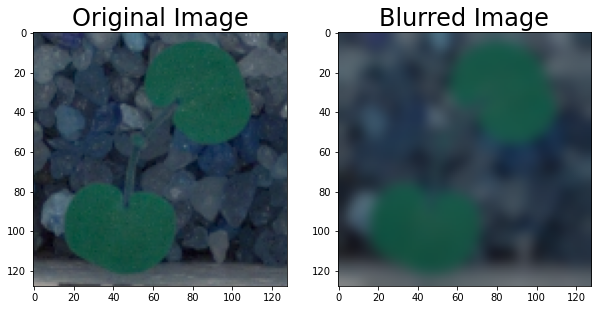

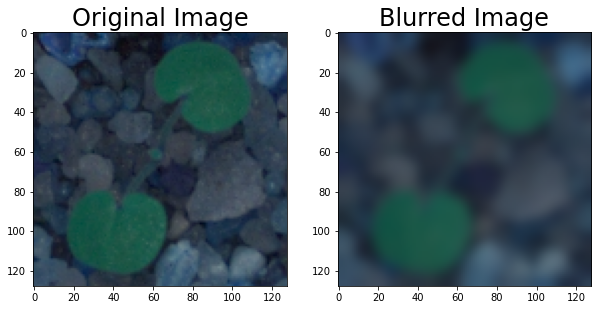

In [11]:
### Example of Blurring of selected images using CV2
### Shows blurred examples of 3 images
def blur(img):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    ax[0].imshow(img)
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(cv2.GaussianBlur(img, (0, 0), 3))
    ax[1].set_title('Blurred Image', fontsize=24)
    plt.show()

blur(images[3])
blur(images[4])
blur(images[5])

# Masking the Images

## Identify the green in the image

### Use the Cv2.cvtColor() method
Syntax: cv2.cvtColor(src, code[, dst[, dstCn]])

Parameters:
src: It is the image whose color space is to be changed.
code: It is the color space conversion code.

cv2.cvtColor() method is used to convert an image from one color space to another.
Ppassing the BGR values you want. For example, to find the HSV value of Green:
cv2.COLOR_BGR2HSV

Source: https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/

In [12]:
def masking_of_image(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    lower_hsv = np.array([25, 100, 50])
    upper_hsv = np.array([95, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

#### Image Masking - Bitwise Operations
Allows us to extract regions from images that are of completely arbitrary shape.
Bitwise operations are used in image manipulation and used for extracting essential parts in the image.

Syntax: cv2.bitwise_and(source1, source2, destination, mask)

Parameters:
source1: First Input Image array(Single-channel, 8-bit or floating-point)
source2: Second Input Image array(Single-channel, 8-bit or floating-point)
dest: Output array (Similar to the dimensions and type of Input image array)
mask: Operation mask, Input / output 8-bit single-channel mask

Once defined a color range, the cv2.inRange() will try to threshold the image. inRange() takes three parameters, the image, the lower range, and the higher range. it returns a binary masj, the size of the image, where values of 1 indicates values within the range, and zero values indicates values outside

To impose the mask on top of the original image, you can use cv2.bitwise_and(), which keeps every pixel in the given image if the corresponding value in the mask is 1

https://realpython.com/python-opencv-color-spaces/

In [13]:
def Segmentation_of_image(image):
    mask = masking_of_image(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

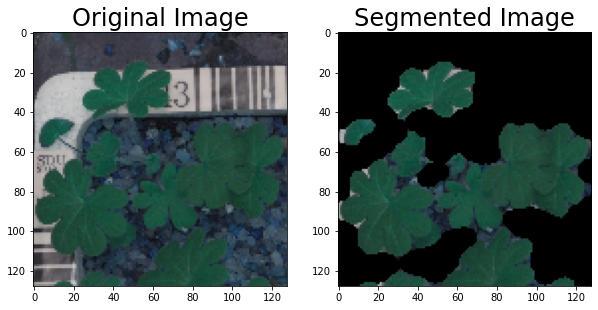

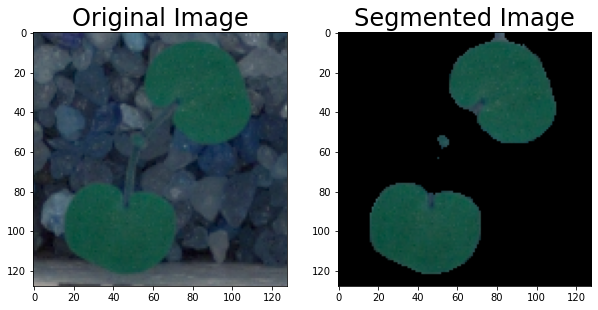

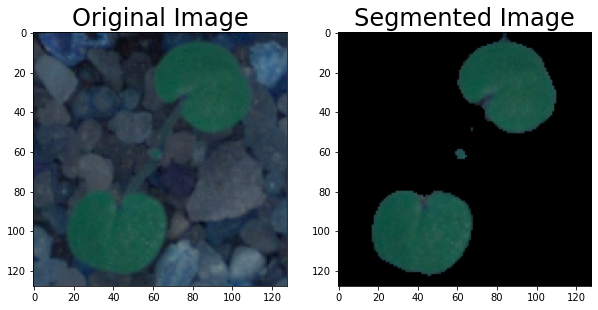

In [14]:
### Example of Segmenting of selected images using CV2
def sgmt(img):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    ax[0].imshow(img)
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(Segmentation_of_image(img))
    ax[1].set_title('Segmented Image', fontsize=24)
    plt.show()

sgmt(images[3])
sgmt(images[4])
sgmt(images[5])

In [15]:
### Function for Pre-Processing images
# 1. Segmentation of image - combines two functions  for Color scheme and extracting essential part of the image
# 2. Blurring and Sharpening the image after segmentation


def CombineProceesingSteps(img):

  image_segment_Processed = Segmentation_of_image(img)
  image_sharp_Processed = Blur_sharp_image(image_segment_Processed)
  return image_sharp_Processed

In [16]:
### Process the Pre-Processing on all images by looping through each image and calling up the function CombineProcessingSteps

for i, image in enumerate(images):
  images[i] = CombineProceesingSteps(image)

Text(0.5, 1.0, 'Image Blurring & Sharpening')

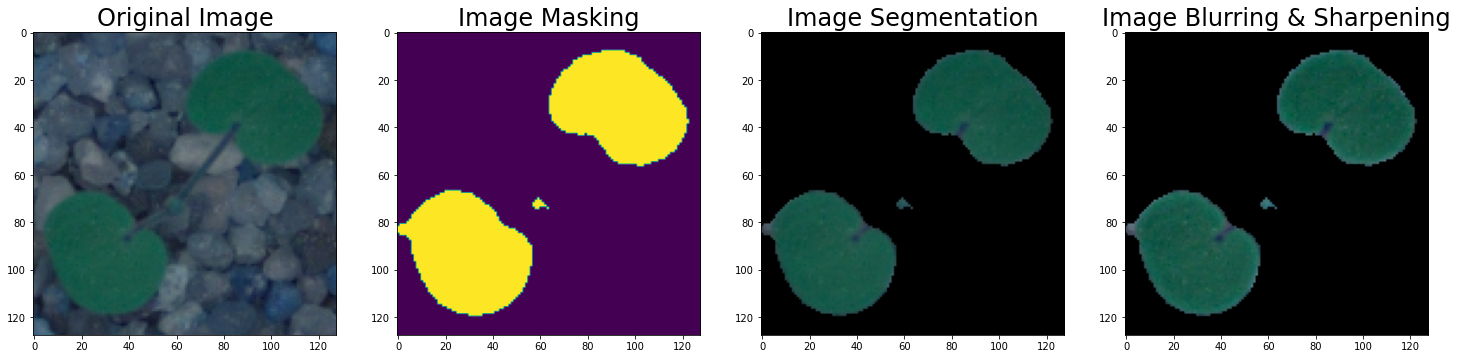

In [18]:
# Plot Sample Image : Before and After Image Processing
image = images2[classes == "Small-flowered Cranesbill"][20]

image_mask = masking_of_image(image)
image_segmented = Segmentation_of_image(image)
image_sharpen = Blur_sharp_image(image_segmented)

fig, ax = plt.subplots(1, 4, figsize=(25, 25))
ax[0].imshow(image)
ax[0].set_title('Original Image', fontsize=24)
ax[1].imshow(image_mask)
ax[1].set_title('Image Masking', fontsize=24)
ax[2].imshow(image_segmented)
ax[2].set_title('Image Segmentation', fontsize=24)
ax[3].imshow(image_sharpen)
ax[3].set_title('Image Blurring & Sharpening', fontsize=24)

# Part 3 - Making Data Compatible

In [19]:
images.shape

(4750, 128, 128, 3)

### Normalization

In [20]:
images2 = images/255

## Encode the labels

In [21]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [ ]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

### Train Test Split - 30% (Test) / 70 % (train)

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images2, y, test_size=0.3, random_state=50)

In [23]:
X_train.shape

(3325, 128, 128, 3)

### Validation Set - 50%

In [24]:

random_seed = 42
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [25]:
print(X_test.shape)
print(X_val.shape)

(712, 128, 128, 3)
(713, 128, 128, 3)


## Part 4 - The Model : CNN

In [26]:
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam




In [27]:
batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(12, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1

# Part 5 - Fit and Evaluate

In [28]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [29]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Epoch 1/50
104/104 [==============================] - 36s 58ms/step - loss: 2.4020 - accuracy: 0.1745 - val_loss: 1.9805 - val_accuracy: 0.3029
Epoch 2/50
104/104 [==============================] - 5s 46ms/step - loss: 1.9291 - accuracy: 0.3154 - val_loss: 1.8426 - val_accuracy: 0.3983
Epoch 3/50
104/104 [==============================] - 5s 46ms/step - loss: 1.8948 - accuracy: 0.3278 - val_loss: 1.7263 - val_accuracy: 0.4376
Epoch 4/50
104/104 [==============================] - 5s 45ms/step - loss: 1.6441 - accuracy: 0.3956 - val_loss: 1.5277 - val_accuracy: 0.5231
Epoch 5/50
104/104 [==============================] - 5s 46ms/step - loss: 1.4082 - accuracy: 0.4948 - val_loss: 1.2996 - val_accuracy: 0.5863
Epoch 6/50
104/104 [==============================] - 5s 46ms/step - loss: 1.3093 - accuracy: 0.5401 - val_loss: 1.1160 - val_accuracy: 0.6466
Epoch 7/50
104/104 [==============================] - 5s 46ms/step - loss: 1.1010 - accuracy: 0.6161 - val_loss: 1.0465 - val_accuracy: 0.657

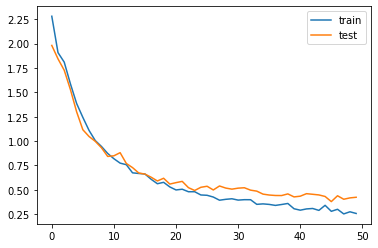

In [30]:

history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4223386347293854
Test accuracy: 0.8637640476226807


## Confusion Matrix

In [32]:
classLabels = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [33]:
######
from sklearn.metrics import accuracy_score, confusion_matrix
# --> Predict 
y_pred = model.predict(X_test) 
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

conf_matrix = confusion_matrix(y_true, y_pred_classes)

short_labels = ['BlckGras', 'ChLock', 'Clvrs', 'CommonChick', 'ComWeat', 'FatHen', 'LSilkBent', 'Maize', 'ScntMay', 'ShepPurs', 'SmFlwrCrn', 'SgrBeet']
pd.DataFrame({'class': classLabels, 'Labels': short_labels})

,class,Labels
0,Black-grass,BlckGras
1,Charlock,ChLock
2,Cleavers,Clvrs
3,Common Chickweed,CommonChick
4,Common wheat,ComWeat
5,Fat Hen,FatHen
6,Loose Silky-bent,LSilkBent
7,Maize,Maize
8,Scentless Mayweed,ScntMay
9,Shepherds Purse,ShepPurs


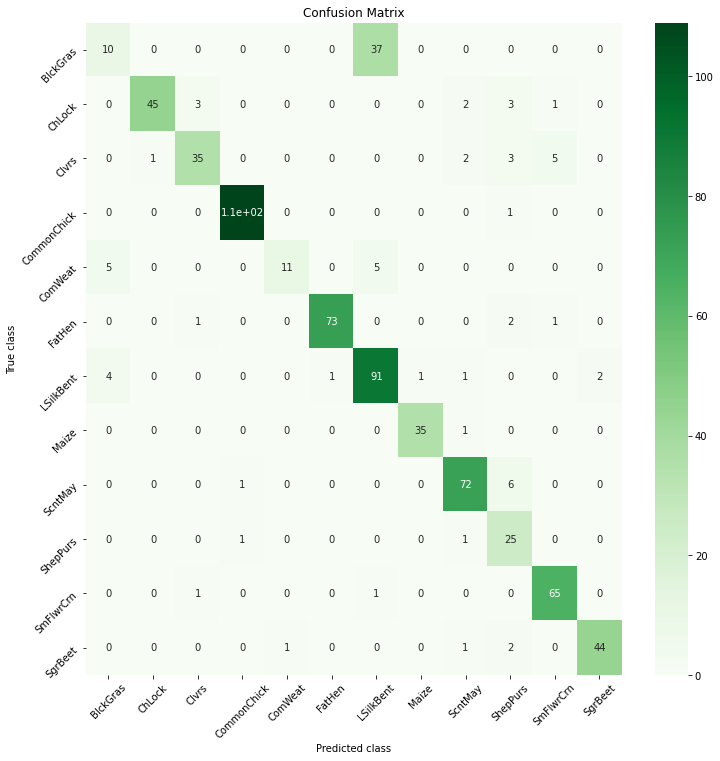

In [34]:

# Confusion Matrix
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(conf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(short_labels, rotation=45)
ax.set_yticklabels(short_labels, rotation=45)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
fig.savefig('Confusion matrix.png', dpi=300)
plt.show();

# Part 6. Test some Images

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Defined Predicrted classes
PredictedClasses = np.argmax(model.predict(X_test), axis=-1)


In [38]:
# Function to show predicted VS actual
def TestImage(myImage, MyImageActual):
  pred = model.predict_classes(np.array(myImage))[0]
  actual = np.argmax(MyImageActual)
  print("Predicted class: {}".format(enc.classes_[pred]))
  print("Actual class: {}".format(enc.classes_[actual]))

In [39]:
# Defining which images to evalute between predicted and Actual - Pass these to the function above
X_test_ImageSample1 = [X_test[2]]
y_test_ImageSample1 = y_test[2]          

X_test_ImageSample2 = [X_test[3]]
y_test_ImageSample2 = y_test[3]     

X_test_ImageSample3 = [X_test[33]]
y_test_ImageSample3 = y_test[33]     

X_test_ImageSample4 = [X_test[36]]
y_test_ImageSample4 = y_test[36]  

X_test_ImageSample5 = [X_test[59]]
y_test_ImageSample5 = y_test[59]   

In [40]:
# Evalute Image number 1 - indexed :2
TestImage(X_test_ImageSample1,y_test_ImageSample1)

Predicted class: Common Chickweed
Actual class: Common Chickweed


In [41]:
# Evalute Image number 2 - indexed :3
TestImage(X_test_ImageSample2,y_test_ImageSample2)


Predicted class: Scentless Mayweed
Actual class: Scentless Mayweed


In [42]:
# Evalute Image number 3 - indexed :33
TestImage(X_test_ImageSample3,y_test_ImageSample3)

Predicted class: Loose Silky-bent
Actual class: Black-grass


In [43]:
# Evalute Image number 4 - indexed :36
TestImage(X_test_ImageSample4,y_test_ImageSample4)

Predicted class: Loose Silky-bent
Actual class: Loose Silky-bent


In [44]:
# Evalute Image number 5 - indexed :59
TestImage(X_test_ImageSample5,y_test_ImageSample5)

Predicted class: Sugar beet
Actual class: Loose Silky-bent


In [ ]:
# Testing Some More

In [45]:
X_test_ImageSample4 = [X_test[199]]
y_test_ImageSample4 = y_test[199]  

In [46]:
TestImage(X_test_ImageSample4,y_test_ImageSample4)

Predicted class: Maize
Actual class: Maize


In [47]:
X_test_ImageSample4 = [X_test[301]]
y_test_ImageSample4 = y_test[301] 

In [48]:
TestImage(X_test_ImageSample4,y_test_ImageSample4)

Predicted class: Loose Silky-bent
Actual class: Black-grass


In [ ]:
# ======================================================================= END ===============================================